In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [32]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [33]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In above dataset Happiness Rank is like a indexing and Country and Region are int data type,
here we need only two types of data  : numerical data and those which are contributing to make Happiness score. 

# EDA ---

Exploratory Data Analysis (EDA): EDA process will give us the batter understanding towards the pattern of Dataset

In [34]:
data['Happiness Score-Target']=data['Happiness Score']

In [35]:
data=data.iloc[:,4:]
data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score-Target
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


Now we will check the smallest things, Which will be contributed to understand the data by person.

In [36]:
data.shape

(158, 9)

In [37]:
data.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Score-Target'],
      dtype='object')

In [38]:
data.dtypes

Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score-Target           float64
dtype: object

In [39]:
data.isnull().sum()

Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score-Target           0
dtype: int64

Describing datasets

In [40]:
data.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score-Target
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


From the above outcomes we can say that

1.High standard deviation are very less, hence data is less spreded.we can say chances of outliers are very less but are present in standard Error,Trust (Government Corruption),Generosity and Family columns.

2.Mean values and 50%(Median) shows us some skewness present in Standard Error, Family, Health (Life Expectancy), Trust (Government Corruption) and Generosity columns.

3.Less gap is present between 75%tile and the maximum value, Hence here also the chances of outliers are zero. 


Skewness

In [41]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

In [42]:
data.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score-Target           0.097769
dtype: float64

Standard Error
1.964559396207682


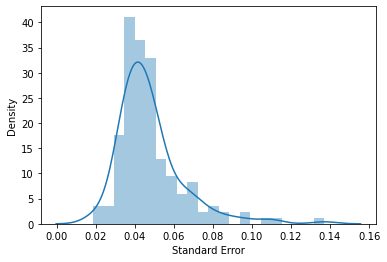

Economy (GDP per Capita)
-0.31455171687947103


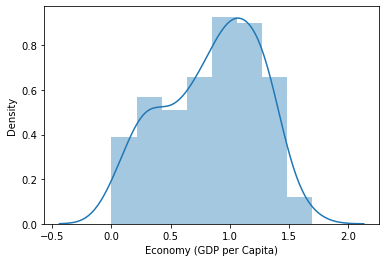

Family
-0.997308693697779


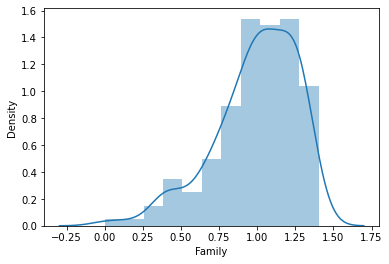

Health (Life Expectancy)
-0.69861459190758


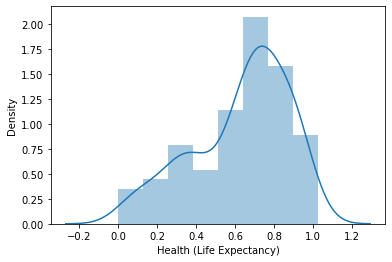

Freedom
-0.4095263034516996


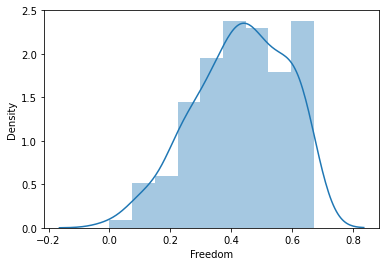

Trust (Government Corruption)
1.3722746285872593


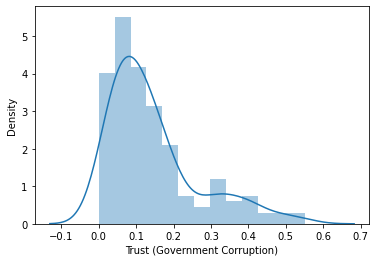

Generosity
0.9924230947758468


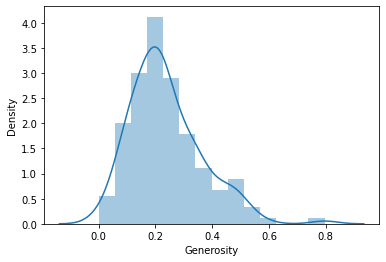

Dystopia Residual
-0.2366366607660101


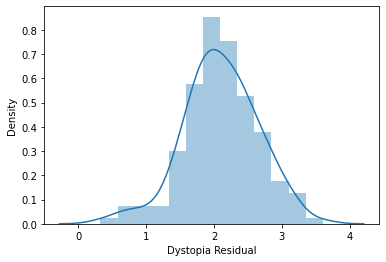

Happiness Score-Target
0.09683844783925286


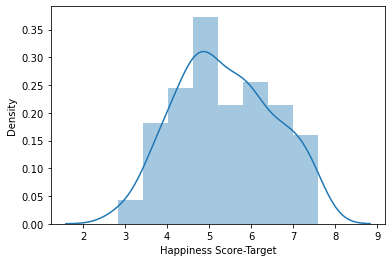

In [43]:
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

Standard Error                      AxesSubplot(0.125,0.657941;0.110714x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Family                           AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Health (Life Expectancy)         AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Freedom                          AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Trust (Government Corruption)    AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Generosity                          AxesSubplot(0.125,0.391471;0.110714x0.222059)
Dystopia Residual                AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Happiness Score-Target           AxesSubplot(0.390714,0.391471;0.110714x0.222059)
dtype: object

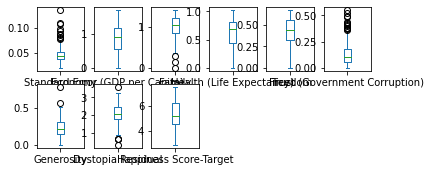

In [44]:
data.plot(kind='box',subplots=True,layout=(3,6))

Corelation-Test

This test gives us the batter understanding of covariance. corelation tells us how correleted the variables are to each other. 

In [45]:
data.corr()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score-Target
Standard Error,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score-Target,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


In [46]:
data.corr()['Happiness Score-Target'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score-Target           1.000000
Name: Happiness Score-Target, dtype: float64

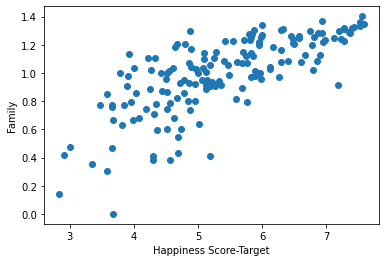

In [47]:
a=data['Happiness Score-Target']
b=data['Family']
plt.xlabel('Happiness Score-Target')
plt.ylabel('Family')
plt.scatter(a,b)
plt.show()

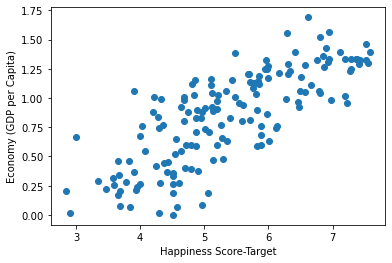

In [48]:
a=data['Happiness Score-Target']
b=data['Economy (GDP per Capita)']
plt.xlabel('Happiness Score-Target')
plt.ylabel('Economy (GDP per Capita)')
plt.scatter(a,b)
plt.show()

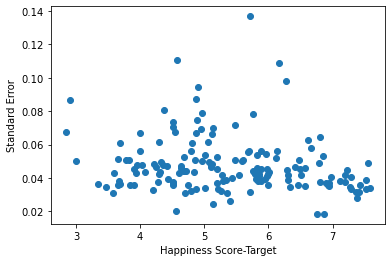

In [49]:
a=data['Happiness Score-Target']
b=data['Standard Error']
plt.xlabel('Happiness Score-Target')
plt.ylabel('Standard Error')
plt.scatter(a,b)
plt.show()

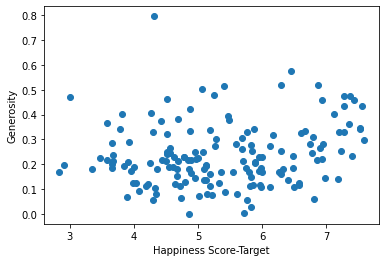

In [50]:
a=data['Happiness Score-Target']
b=data['Generosity']
plt.xlabel('Happiness Score-Target')
plt.ylabel('Generosity')
plt.scatter(a,b)
plt.show()

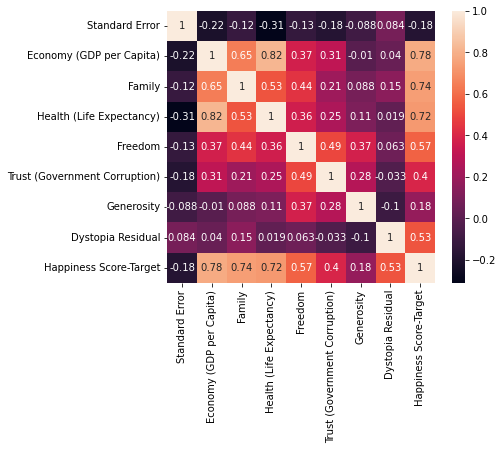

In [51]:
corr_hmap=data.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_hmap,annot=True)
plt.show()

From the above outcomes we can say that:

1."Standard Error" has very negative correlation with the target column which can be considered as a poor bond.

2."Economy" has 78 percent correlation with the target column which can be considered as good bond.

3."Family" has 74 percent correlation with the target column which can be considered as a good bond.

4."Health" has 72 percent correlation with the target column which can be considered as a good bond.

5."Freedom" has 57 percent correlation with the target column which can be considered as a good bond.

6."Trust" has 40 percent correlation with the target column which can be considered as a weak bond.

7."Generosity" has 18 percent correlation with the target column which can be considered as a poor bond.

8."Dystopia Residual" has 53 percent correlation with the target column which can be considered as a weak bond.

Max corelation : Economy
    
Min corelation : Generosity
    
Negative corelation : Standard Error

# Data Preprocessing

# Data Cleaning

We are Droping "Standard Error" because it has very negative correlation with the target column.

In [52]:
data=data.drop(["Standard Error"],axis=1)

In [53]:
data.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score-Target'],
      dtype='object')

Removing Skewness with Squreroot Transformation Technique

0.5028308183891492


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

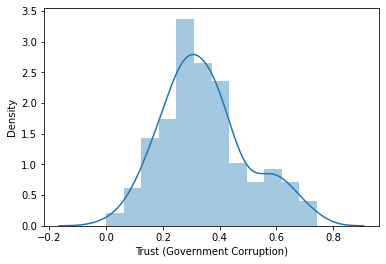

In [54]:
data['Trust (Government Corruption)']=np.sqrt(data["Trust (Government Corruption)"])
print(skew(data['Trust (Government Corruption)']))
sns.distplot(data['Trust (Government Corruption)'])

-0.1297145487213065


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

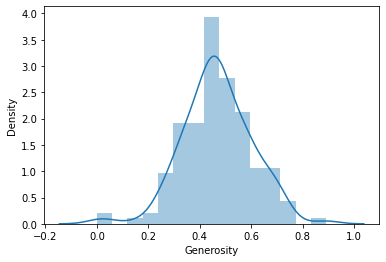

In [55]:
data['Generosity']=np.sqrt(data['Generosity'])
print(skew(data['Generosity']))
sns.distplot(data['Generosity'])

-2.172194511806461


<AxesSubplot:xlabel='Family', ylabel='Density'>

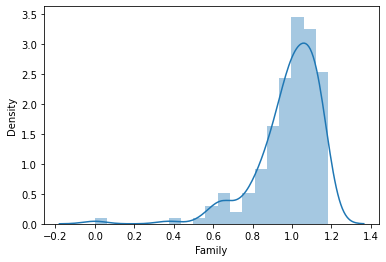

In [56]:
data['Family']=np.sqrt(data['Family'])
print(skew(data['Family']))
sns.distplot(data['Family'])

Removing Outliers

In [57]:
import scipy
from scipy.stats import zscore

In [58]:
z=np.abs(zscore(data))
z.shape

(158, 8)

In [59]:
threshold=3
print(np.where(z>3))

(array([ 63, 101, 128, 147, 155, 157], dtype=int64), array([5, 5, 5, 1, 6, 1], dtype=int64))


In [60]:
data_new=data[(z<3).all(axis=1)]

In [61]:
data.shape

(158, 8)

In [62]:
data_new.shape  # we removed outliers

(152, 8)

In [63]:
print("old data frame :",data.shape)
print("new data frame :",data_new.shape)
print("total droped rows :",data.shape[0]-data_new.shape[0])

old data frame : (158, 8)
new data frame : (152, 8)
total droped rows : 6


In [64]:
loss_percent=(158-152)/158*100
print(loss_percent,'%')

3.79746835443038 %


In [65]:
x=data_new.iloc[:,0:-1]

In [66]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.161684,0.94143,0.66557,0.647904,0.544775,2.51738
1,1.30232,1.184158,0.94784,0.62877,0.376098,0.660530,2.70201
2,1.32548,1.166439,0.87464,0.64938,0.695392,0.584286,2.49204
3,1.45900,1.153668,0.88521,0.66973,0.604177,0.589059,2.46531
4,1.32629,1.150048,0.90563,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...
151,0.25812,0.922973,0.27125,0.39493,0.358218,0.466337,1.46494
152,0.31982,0.550318,0.30335,0.23414,0.311753,0.604235,1.95210
153,0.22208,0.879602,0.42864,0.59201,0.742906,0.475689,0.67042
154,0.28665,0.594861,0.31910,0.48450,0.283019,0.427317,1.63328


In [67]:
y=data_new.iloc[:,-1]

In [68]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.587
152    3.575
153    3.465
154    3.340
156    2.905
Name: Happiness Score-Target, Length: 152, dtype: float64

In [69]:
x.shape

(152, 7)

In [70]:
y.shape

(152,)

Spliting the dataframe

In [71]:
lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
per=lr.score(x_train,y_train)
per

0.9988646911133628

In [75]:
print("Model is Working",per,"% or We can say model is learned ",per,"%")

Model is Working 0.9988646911133628 % or We can say model is learned  0.9988646911133628 %


In [76]:
pred=lr.predict(x_test)
print("predicted Happiness Score :\n",pred)
print("Actual Happiness Score :\n",y_test)

predicted Happiness Score :
 [5.53034333 3.62513237 4.92857298 5.09968117 3.99634025 3.88386452
 6.72438792 7.23503535 6.96161809 6.97855646 4.01048749 4.33172294
 4.64642202 6.9117314  5.53688201 7.26411224 5.75886476 6.45318018
 4.12524155 4.57209121 4.58117804 6.51232806 5.86403075 5.62091276
 5.8349196  3.93922462 6.3147472  5.06165217 4.61394576 6.16921171
 5.1242739  6.551667   6.73580566 5.85893601 5.28793076 7.25397813
 4.23494834 4.52783732 5.63271267 6.58209265 3.47936417 4.32355902
 7.40716711 6.46630083 5.98480656 3.87097984 4.62423509 6.95412886
 7.30851324 4.44061523 4.89575937]
Actual Happiness Score :
 69     5.548
151    3.587
97     4.885
83     5.140
138    3.989
142    3.896
26     6.670
12     7.200
18     6.937
15     6.983
137    3.995
131    4.271
110    4.681
19     6.901
70     5.477
9      7.284
66     5.689
30     6.505
129    4.297
117    4.550
115    4.571
31     6.485
56     5.828
68     5.589
60     5.770
141    3.904
36     6.302
87     5.102
114    4.6

In [77]:
print("Error")

print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error : ",mean_squared_error(y_test,pred))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))

Error
Mean absolute error : 0.03583411359364102
Mean squared error :  0.002649279566697823
Root mean squared error : 0.05147115276247291


Cofficient of Determination

In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9979889431294494


In [79]:
import numpy as np

In [80]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df=pd.DataFrame({"Original":a,"Predicted":predicted})
df[0:5]

,Original,Predicted
0,5.548,5.530343
1,3.587,3.625132
2,4.885,4.928573
3,5.140,5.099681
4,3.989,3.996340


conclusion : We have achived 99 % accuracy..we can say our model is working well and now our model is ready to predict the new data.

In [81]:
t=np.array([1.4865,1.0589,0.8005,0.5882,0.4789,0.3878,2.1024])

In [82]:
t.shape

(7,)

In [83]:
t=t.reshape(1,-1)
t.shape

(1, 7)

In [84]:
lr.predict(t)

array([6.51450109])